## Supermarket Sales Analysis

We will be analysing the sales data from a **supermarket** to get deep insights about the type of customers and their satisfactioon in the buying process while also exploring other areas that drives growth of the Business


**GOAL : What are the aspects that affects the Satisfaction of the Customer?**

What am about to do?

-  Importing the modules & reading the data
-  Getting to know the data
-  Cleaning & Preprocessing
   - Basic data cleansing
   - Handle missing values
   - Handling outliers
   - Remove duplicates
- Visualizing the data
   - Scatter plots
   - Joint plots
   - Pie plots
   - Pair plots
   - Box plots
- Pattern recognition
   - Histogram
   - Heatmap
   - KDE plot
   - Univariate analysis
   - Bivariate analysis
   - Multivariate analysis
   

## 1. Importing the Modules & Reading the data

In [1]:
# Imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
import scipy.stats as stats


# Setting defaults
filterwarnings('ignore')
sns.set_style("white")


# Reading the data
df = pd.read_csv("Supermarket Sales.csv")

## 2. Getting to know the Data

The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

1. **Invoice id:** Auto-generated Invoice ID

2. **Branch:** Branch of the supercenter
   - Branch A
   - Branch B
   - Branch C
    
3. **City:** Location of supercenters

4. **Customer type:** Type of customers
   - Members
   - Normal

5. **Gender:** Customer Gender
   - Male
   - Female

6. **Product line:** Product item category

7. **Unit price:** Product price in $

8. **Quantity:** Products purchased quantity

9. **Tax:** 5% tax on bill

10. **Total:** Price including tax

11. **Date:** Purchase date

12. **Time:** Purchase time

13. **Payment:** Payment method used
    - Cash
    - Credit card
    - Ewallet

14. **COGS:** Cost of goods sold

15. **Gross margin percentage:** Gross margin percentage

16. **Gross income:** Gross income

17. **Rating:** Overall customer satisfaction (1 to 10)


In [2]:
## Shape of the data
df.shape

(1000, 17)

Our data has around 1000 invoices and 17 features

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

**Initial Observations about the data**

- Seems to be there is no missing values as per the count but we need to check individually
- We can go ahead and remove Invoixe ID column as its not required
- There is a date and time column as object data type, we will convert it to datetime

**Brainstorming questions about the data**
1. Is there any Branch that keeps the customer very satisfied and is there any branch that messes a lot?
2. Customers from which city love our products? and who actually hate us?
3. Do we really keep our members happy?
4. Are we concentrating too much on members alone while ignoring our normal customers?
5. Is there any significant change in satification for male and female?
6. Customers from certain set of categories love our service more?
7. Does price affect the satisfaction of our customers?
8. What does the satisfaction of customers look like on specific days?
9. What does the satisfaction of customers look like on specific time of day? (10am -2pm, 2pm - 5pm, 5pm - 9pm)
10. Satisfaction of customers during peak hours?
11. Any relationship between the payment method and satisfaction?
12. Does the gross profit affect the satisfaction?

## 3. Cleaning & Preprocessing

In [4]:
# I will be removing unwanted columns
df.drop(["gross margin percentage", "Invoice ID"], axis=1, inplace=True)

### 3.1 Missing data

In [5]:
# Missing values heatmap
df.isnull().sum()

Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           0
Total            0
Date             0
Time             0
Payment          0
cogs             0
gross income     0
Rating           0
dtype: int64

In [6]:
# Another way to look out for missing values
df.isna().sum()

Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           0
Total            0
Date             0
Time             0
Payment          0
cogs             0
gross income     0
Rating           0
dtype: int64

Both are good, and we don't have to worry about missing values for now

### 3.2 Outliers

I will be filtering out outliers with three approaches

- Histogram and Box Plots (Numerical Columns)
- Descriptive Statistics (Numerical Columns)
- Barchart (Categorical Columns)


In [7]:
# Seperating Numerical columns
df_num = df.select_dtypes(include="number")

**Histogram of all the numerical columns**

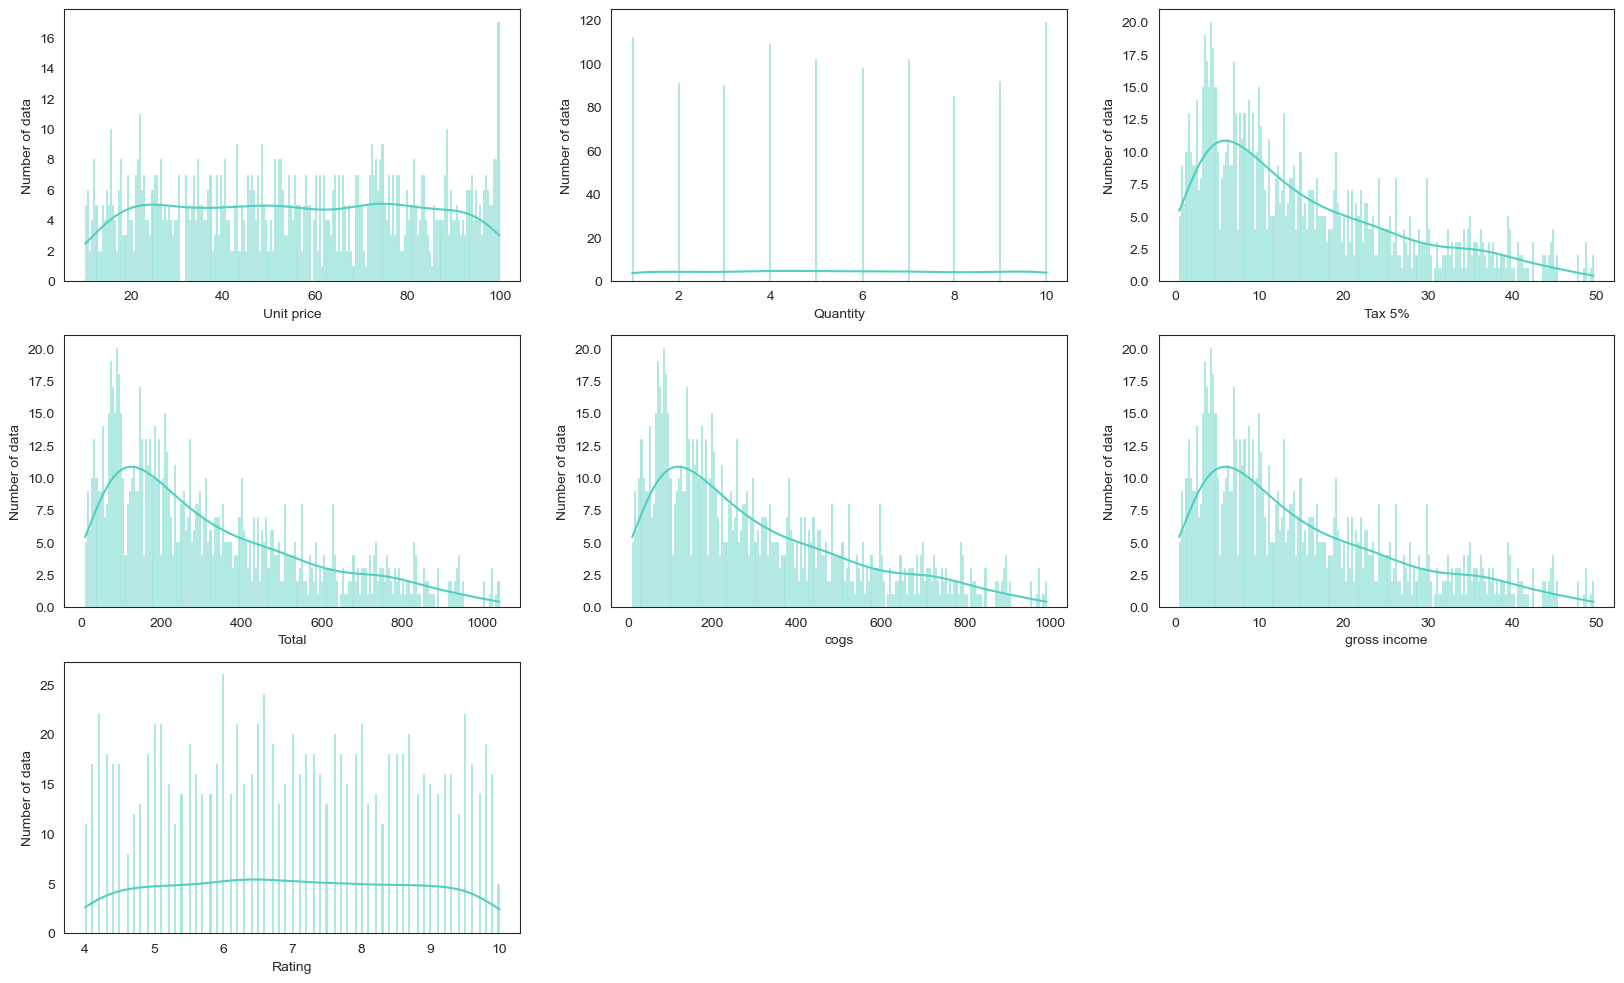

In [8]:
#Histogram
plt.figure(figsize=(20,12))
for i,col in enumerate(df_num.columns, start=1):
    plt.subplot(3,3,i)
    sns.histplot(x=col,data=df_num, bins=200, kde=True, color="#51cfc0")
    plt.ylabel('Number of data') 
plt.show;

**As per the above histogram, we can see that**
- The Tax, Total price, Cost of goods sold and gross income are all **Moderately Positively Skwewed**
- Lets look at the box plot too fo better close view

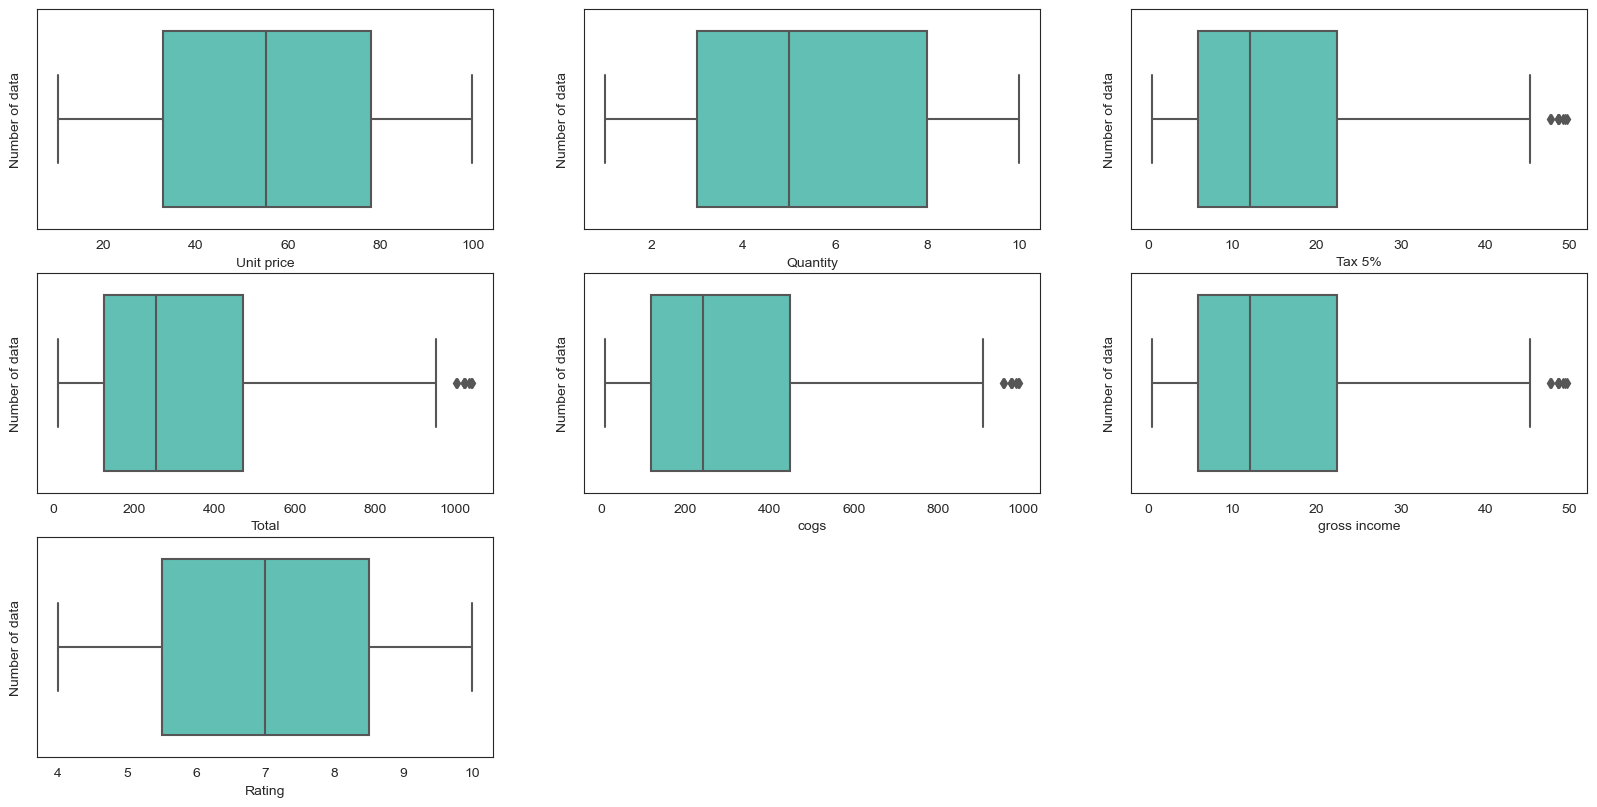

In [9]:
#Box Plots
plt.figure(figsize=(20,20))
for i,col in enumerate(df_num.columns, start=1):
    plt.subplot(6,3,i)
    sns.boxplot(x=col,data=df_num, color="#51cfc0")
    plt.xlabel(col)
    plt.ylabel('Number of data') 
plt.show;

Seems like those columns have a mild outlier, it doesn't seem to be unreal. This might be due to few purchases with very large price. let's comeback to this after checking the Descriptive Stats too.

**Descriptive Statistics**

In [10]:
# Descriptive Stats
df_num.describe().T

Estimates = df_num.describe()
Estimates.loc['Trimmed Mean'] = stats.trim_mean(df_num, 0.1)
Estimates.loc['Median'] = df_num.median()
Estimates.loc['Skewness'] = df_num.skew()
Estimates.loc['Kurtosis'] = df_num.kurtosis()
Estimates.loc['IQR'] = df_num.quantile(0.75) - df_num.quantile(0.25)

unwanted_metrics = ['count', 'min', 'max',]

#Dropping unwanted default metrics
Estimates.drop(unwanted_metrics, inplace=True, axis=0)
Estimates

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
mean,55.672130,5.510000,15.379369,322.966749,307.587380,15.379369,6.972700
std,26.494628,2.923431,11.708825,245.885335,234.176510,11.708825,1.718580
25%,32.875000,3.000000,5.924875,124.422375,118.497500,5.924875,5.500000
50%,55.230000,5.000000,12.088000,253.848000,241.760000,12.088000,7.000000
75%,77.935000,8.000000,22.445250,471.350250,448.905000,22.445250,8.500000
Trimmed Mean,55.617800,5.512500,13.995553,293.906616,279.911062,13.995553,6.973125
Median,55.230000,5.000000,12.088000,253.848000,241.760000,12.088000,7.000000
Skewness,0.007077,0.012941,0.892570,0.892570,0.892570,0.892570,0.009010
Kurtosis,-1.218591,-1.215547,-0.081885,-0.081885,-0.081885,-0.081885,-1.151587
IQR,45.060000,5.000000,16.520375,346.927875,330.407500,16.520375,3.000000


**The descriptive statistis also says that:**

- The data has high standard deviation
- Mean varies from the trimmed mean which says that the mean if affected by certain extreme values
- Same as trimmed mean Median also says the same.

While this is due to the data being Moderately Skewed, lets try to fix the skweness by the following:
- Log Transformation
- Square root Transformation
- Box Cox Transformation

**Applying Data Transformations to fix the Skewness**

In [11]:
skewed_cols = ["Tax 5%", "Total","cogs","gross income"]
skewed_data = df_num[skewed_cols]

# Log Transformation
df_num_log = np.log(skewed_data)

# Square Root Transformation
df_num_sqrt = np.sqrt(skewed_data)

# Box-Cox Transformation
df_num_boxcox = pd.DataFrame()
for column in skewed_data.columns:
    transformed_data, _ = stats.boxcox(skewed_data[column] + 1)  # Adding 1 to ensure strictly positive values
    df_num_boxcox[column] = transformed_data


# Lets compare the skewness after the transformations

skewness_comparision = pd.concat([df_num[skewed_cols].skew(), pd.DataFrame(df_num_log.skew()),pd.DataFrame(df_num_sqrt.skew()), pd.DataFrame(df_num_boxcox.skew())], axis=1 )
skewness_comparision.columns = ["Original","Log Transform", "Sqrt Transform", "BoxCox Transform"]
skewness_comparision

,Original,Log Transform,Sqrt Transform,BoxCox Transform
Tax 5%,0.89257,-0.590974,0.268861,-0.046921
Total,0.89257,-0.590974,0.268861,-0.067895
cogs,0.89257,-0.590974,0.268861,-0.067836
gross income,0.89257,-0.590974,0.268861,-0.046921


The **Boxcox Transformation** helped in reducing the skewness at the most. Let's apply that to both our **numerical data** and the **main data**

In [12]:
# Commiting the changes on df_num
for column in df_num.columns:
    if column in skewed_cols:
        transformed_data, _ = stats.boxcox(df_num[column] + 1)  # Adding 1 to ensure strictly positive values
        df_num[column] = transformed_data

# Commiting the changes on df
for column in df.columns:
    if column in skewed_cols:
        transformed_data, _ = stats.boxcox(df[column] + 1)  # Adding 1 to ensure strictly positive values
        df[column] = transformed_data


Let's also visualize the data with **Histogram** and **Boxplots**

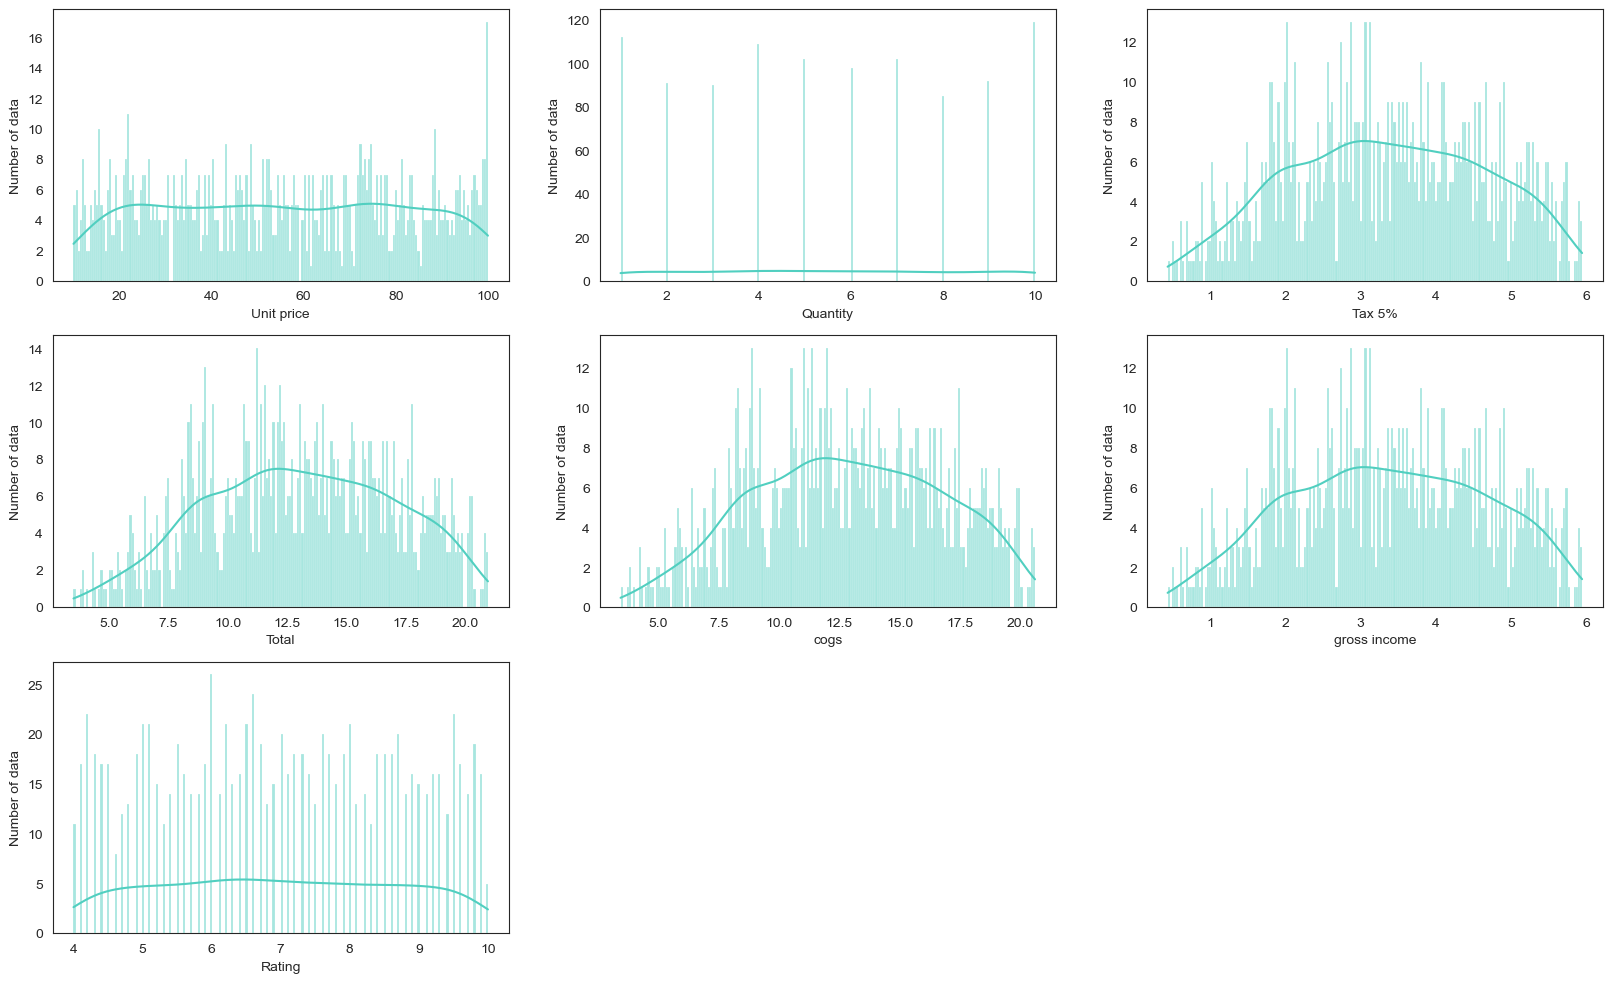

In [13]:
#Histogram
plt.figure(figsize=(20,12))
for i,col in enumerate(df_num.columns, start=1):
    plt.subplot(3,3,i)
    sns.histplot(x=col,data=df_num, bins=200, kde=True, color="#51cfc0")
    plt.ylabel('Number of data') 
plt.show;

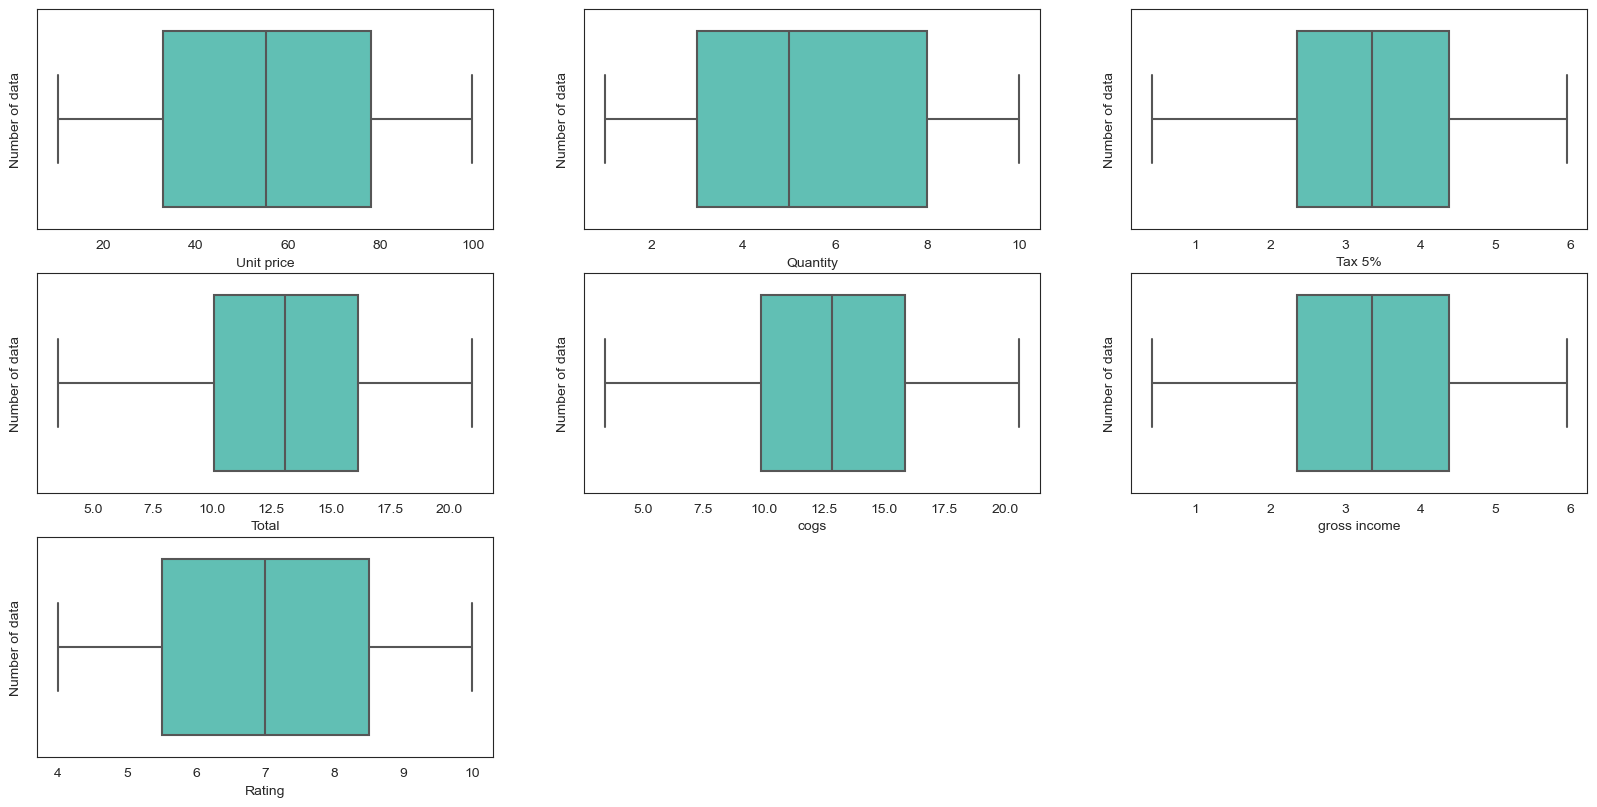

In [14]:
#Box Plots
plt.figure(figsize=(20,20))
for i,col in enumerate(df_num.columns, start=1):
    plt.subplot(6,3,i)
    sns.boxplot(x=col,data=df_num, color="#51cfc0")
    plt.xlabel(col)
    plt.ylabel('Number of data') 
plt.show;

**We can see that we have fixed the skewness and that got rid of the extreme values as well**

**Barchart for checking noise in Categorical Data**

In [15]:
# Selecting all categorical data
df_cat = df.select_dtypes(include="object")
df_cat.drop(["Date","Time"], axis=1, inplace=True)

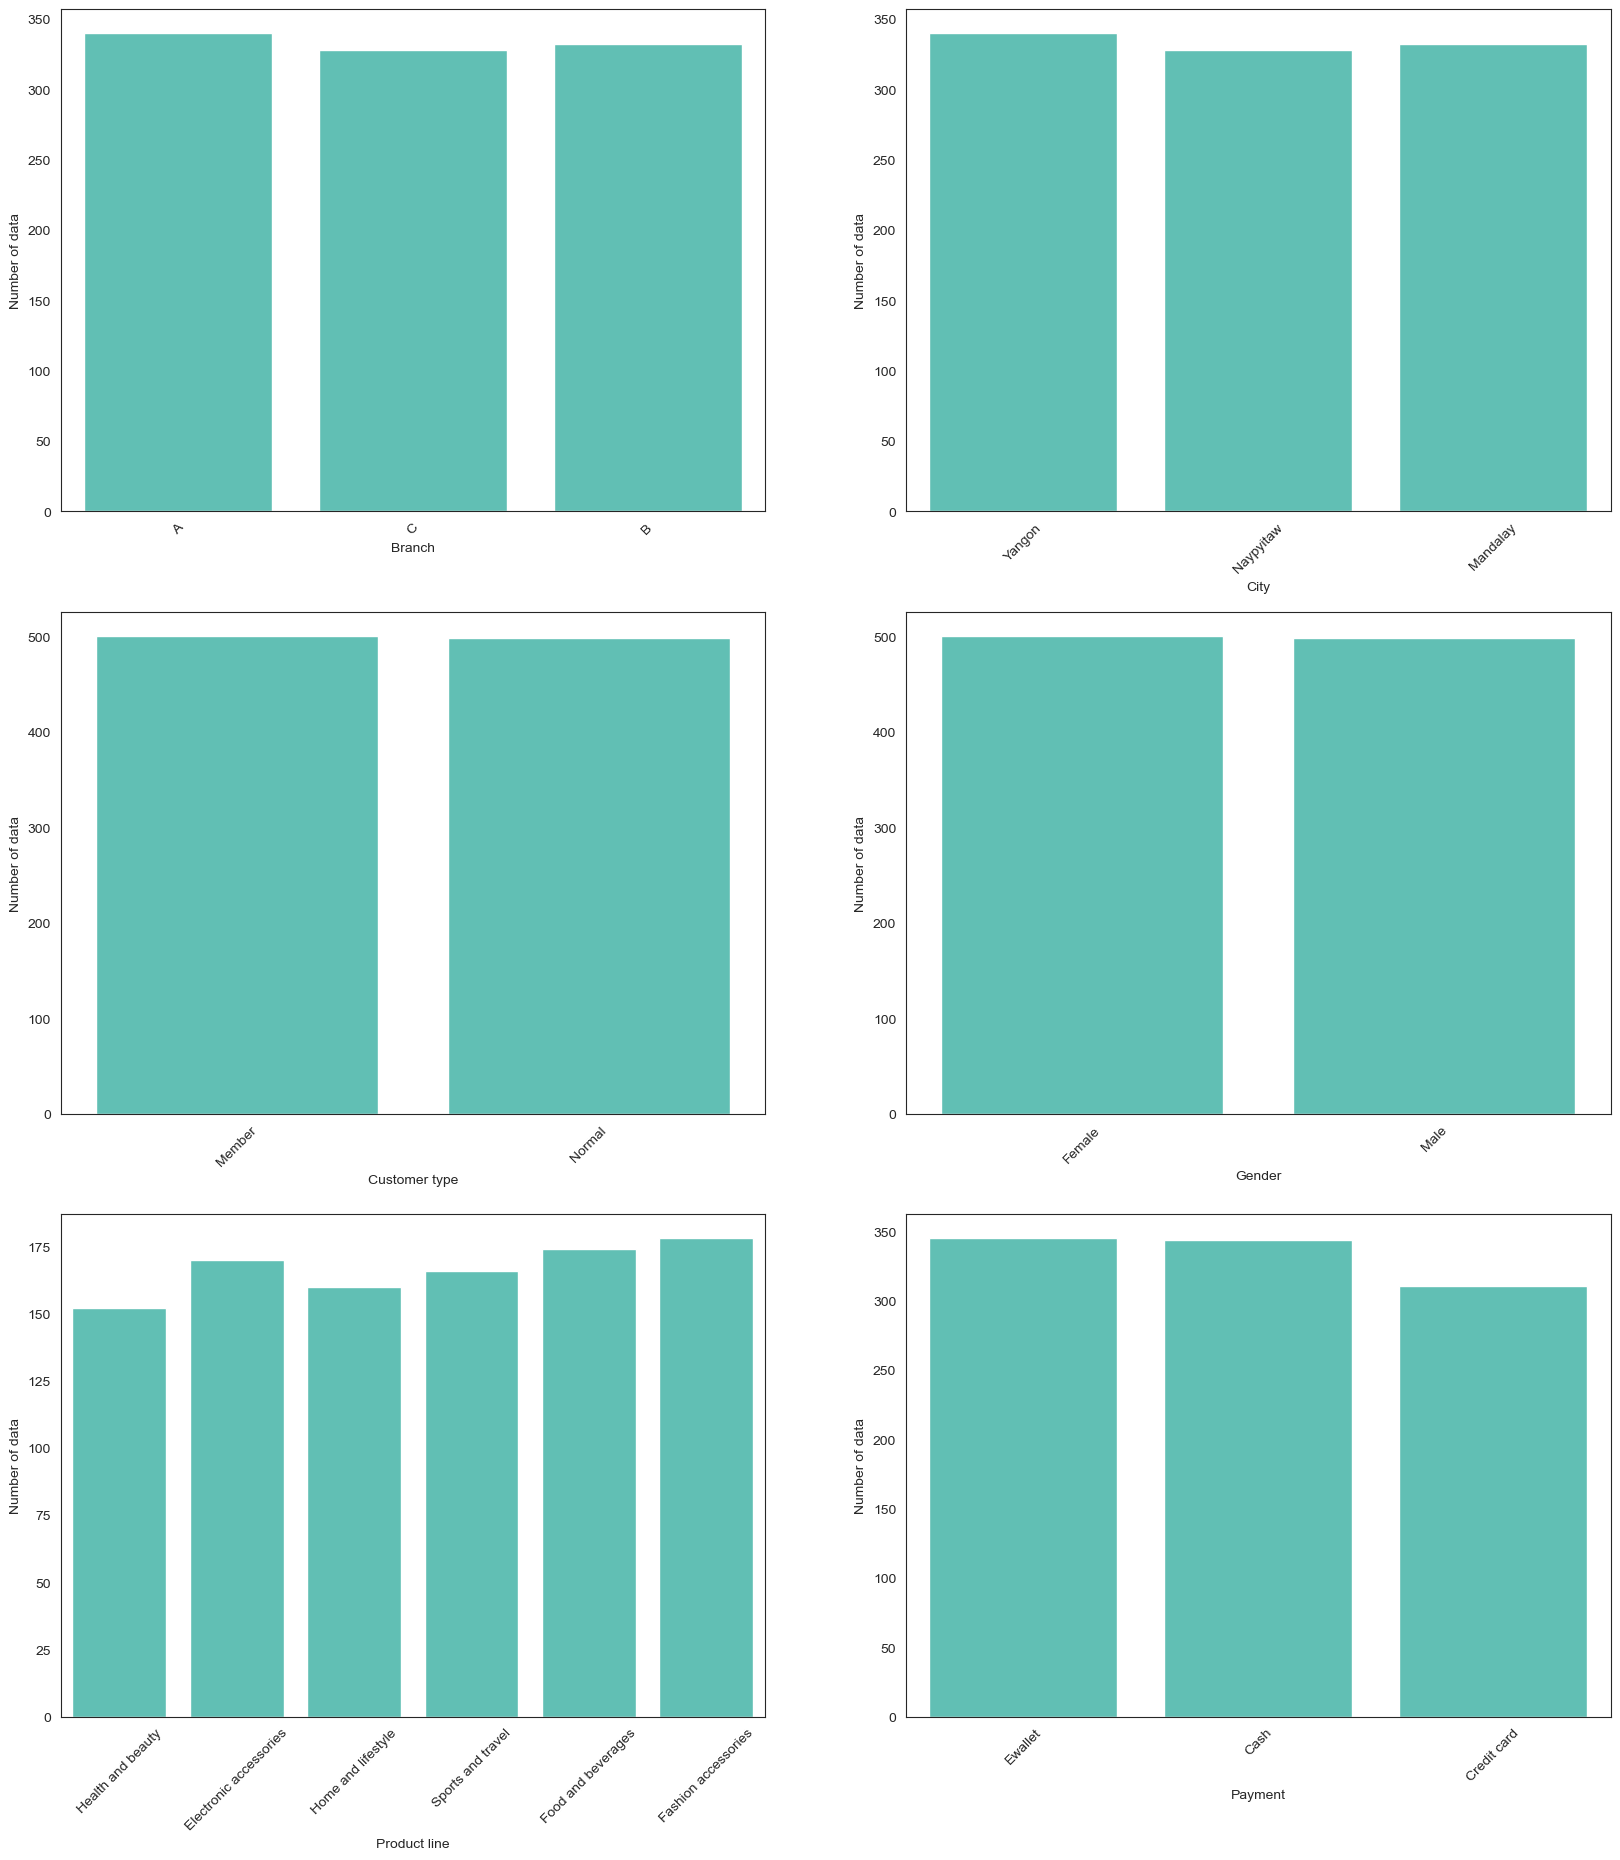

In [16]:
plt.figure(figsize=(20,30))
for i,col in enumerate(df_cat.columns, start=1):
    plt.subplot(4,2,i)
    sns.countplot(x=col,data=df_cat, color="#51cfc0")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.ylabel('Number of data') 
plt.show;

All the columns seems to be **clean** with no random or repeated categories 

### 3.3 Duplicates

In [17]:
if df.drop_duplicates().shape == df.shape:
    print("The data doesn't have any exact duplicates")
else:
    print("The data has duplicate values")

The data doesn't have any exact duplicates
